# BASIC LINEAR MODEL: EDSA Apple Prices Challenge

#The data description and procedure of solving the defined  problem

### Importing neccesary libraries

In [39]:
# Importing Libraries

# Regression models
from sklearn.linear_model import LinearRegression

# Model slection
from sklearn.model_selection import train_test_split

# Preprocessing
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Visualisations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Other
from scipy import stats
import numpy as np
import pandas as pd
import math
import pickle

# Confirmatory Data Analysis

### Loading and viewing data

First we'll load and take a look at he first few rows of our training and testing data

In [60]:
# Importing data from csv files using the read_csv() fuction in the pandas library

train = pd.read_csv('Data/df-train_set.csv')
test = pd.read_csv('Data/df-test_set.csv')

In [82]:
# Looking at the first 5 entries in the datasets to evaluate columns and identify numerical and categorical predictors
train.columns = [col.replace(" ","_") for col in train.columns] 
train = train.drop(['Province'],axis=1)
train.head()

,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


In the dataframe above we will be checking for null values in each column,thus helping us to clean the data.The Pandas library can help us address this with the **info method**. This function tells us which columns are in the dataframe, how many null values they have and the  datatype of each column.

In [83]:
train.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,64376.000000,64376.000000,64376.000000,6.437600e+04,64376.000000,64376.000000,64376.000000,64376.00
mean,12.781592,75.651938,89.607858,1.939501e+04,446.104402,3336.641295,477.646328,NaN
std,35.943052,159.508144,172.223177,4.442192e+04,1184.169758,7682.295441,1453.892091,NaN
min,0.120000,1.000000,1.000000,-5.770000e+04,-595.000000,-5040.000000,-512.000000,-inf
25%,7.000000,30.000000,35.000000,1.154000e+03,20.000000,175.000000,0.000000,4.02
50%,10.000000,46.000000,55.000000,5.400000e+03,107.000000,940.000000,76.000000,6.00
75%,11.000000,80.000000,100.000000,1.877200e+04,390.000000,3250.000000,381.000000,8.67
max,500.000000,4400.000000,4400.000000,1.134701e+06,39453.000000,192230.000000,93193.000000,inf


the dataframe above express the data description of each variable in our dataframe,hence we are going to filter the data in the dataframe by **APPLE GOLDEN DELICIOUS** so we can the datadescription of avg_price_per_kg 

In [84]:
apple_train = train[train.Commodities.str.contains("APPLE GOLDEN DELICIOUS")]
apple_train.drop("Commodities", axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [85]:
apple_train.isna().sum()

Container           0
Size_Grade          0
Weight_Kg           0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64

The above description shows that no null values exit in the dataframe even when filtered by APPLE GOLDEN DELICIOUS ,by such analysis our data is good to start working on

Below is the information of our data in the dataframe,how many variables do we have and their data type 

In [86]:
apple_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Container         1952 non-null   object 
 1   Size_Grade        1952 non-null   object 
 2   Weight_Kg         1952 non-null   float64
 3   Date              1952 non-null   object 
 4   Low_Price         1952 non-null   float64
 5   High_Price        1952 non-null   float64
 6   Sales_Total       1952 non-null   float64
 7   Total_Qty_Sold    1952 non-null   int64  
 8   Total_Kg_Sold     1952 non-null   float64
 9   Stock_On_Hand     1952 non-null   int64  
 10  avg_price_per_kg  1952 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 183.0+ KB


In [87]:
apple_train.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000


# Feature Engineering

**Feature engineering** is the process of using domain knowledge to extract features from raw data. These features can be used to improve the performance of machine learning algorithms. Feature engineering can be considered as applied machine learning itself.

Looking at the columns of the dataset we see that there are two columns (Low_Price, High_Price) that contain the highest and lowest prices the products were sold at. We will add another column containing the difference between Highest and lowest prices.

In [13]:
apple_train["Price_Difference"] = apple_train.High_Price - apple_train.Low_Price

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [88]:
apple_train.head()

,Container,Size_Grade,Weight_Kg,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,M4183,1L,18.3,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,JG110,2M,11.0,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,JE090,2S,9.0,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,M4183,1S,18.3,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,IA400,1S,400.0,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


In the dataset, the entries "Date" column is in string format. We will set this to a Datetime object and split the Date into day, month and year. We will also add day of the week to explore whether the day of the week has an impact on the price of the product.

In [89]:
apple_train['Date']= pd.to_datetime(apple_train['Date'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
apple_train["Day"] = apple_train['Date'].map(lambda x: x.day)
apple_train["Month"] = apple_train['Date'].map(lambda x: x.month)
apple_train["Year"] = apple_train['Date'].map(lambda x: x.year)
apple_train["Day_Of_Week"] = apple_train["Date"].dt.dayofweek
apple_train.drop("Date", axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

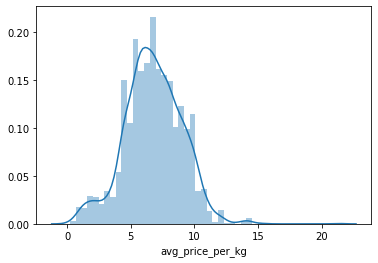

In [90]:
# target distribution
#sns.distplot(dummy_df.avg_price_per_kg, kde=True)

# target distribution
sns.distplot(apple_train['avg_price_per_kg'],kde=True)

The data is normally distributed with a slight skew

!!!!!!!!!!! Dummy variable description !!!!!!!!!!!!!!!!!!!!

A dummy variable is a numerical variable used in regression analysis to represent subgroups of the sample in your study. In research design, a dummy variable is often used to distinguish different treatment groups
As you can observe from the table above,we get little information from summary statistics of our numerical categorical data  (Low_Price ,	High_Price,	Sales_Total) at the moment.

Mostly importantly in order for us to get a good  regression model we need numerical values as inputs in all variable to qualify the model .  We therefore have to transform the text data (found within columns such as ( " Container", "Size_Grade") into numbers before we can train our machine learning model.
 	

To facilitate this transformation from textual-categorical data to numerical equivalents, we use a pandas method called get_dummies. The text data are categorical variables, and get_dummies will transform all the categorical text data into numbers by adding a column for each distinct category. The new column has a 1 for observations which were in this category, and a 0 for observations that were not.

In [ ]:
# Again we make sure that all the column names have underscores instead of whitespaces
df_dummies.columns = [col.replace(" ","_") for col in df_dummies.columns] 


In [91]:
dummy_df = pd.get_dummies(apple_train)

# Again we make sure that all the column names have underscores instead of whitespaces
dummy_df.columns = [col.replace(" ","_") for col in dummy_df.columns] 
dummy_df.head()


,Weight_Kg,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Container_AC030,...,Size_Grade_1L,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X
1,18.3,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51,0,...,1,0,0,0,0,0,0,0,0,0
7,11.0,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55,0,...,0,0,0,0,0,0,1,0,0,0
24,9.0,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11,0,...,0,0,0,0,0,0,0,1,0,0
40,18.3,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51,0,...,0,0,1,0,0,0,0,0,0,0
69,400.0,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50,0,...,0,0,1,0,0,0,0,0,0,0


In [92]:
dummy_df.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Container_AC030,Container_DT063,...,Size_Grade_1L,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,...,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893,0.015881,0.003074,...,0.115266,0.163422,0.272541,0.001025,0.087602,0.061475,0.118852,0.157787,0.008709,0.013320
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744,0.125048,0.055371,...,0.319425,0.369845,0.445381,0.032001,0.282788,0.240262,0.323698,0.364634,0.092939,0.114669
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From the above data we are now in a better situation for feature selection .Model selection is the task of selecting a statistical model from a set of candidate models, given data. In the simplest cases, a pre-existing set of data is considered. 

we will be using the Pearson Correlation Coefficient ,where the highest correlation is considered .

## Correlation and Variable Selection

Using the dummy variable dataframe, we can build a model that predicts SalePrice (our dependent variable) as a function of 41 different independent variables (IVs)

Before we do this, however, let's reorder columns so that our dependent variable is the last column of the dataframe. This will make a heatmap visualisation representing a correlation matrix of our data easier to interpret.

In [93]:
column_titles = [col for col in dummy_df.columns if col!= 'avg_price_per_kg'] + ['avg_price_per_kg']
dummy_df=dummy_df.reindex(columns=column_titles)

In [94]:
dummy_df.corr()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Container_AC030,Container_DT063,Container_EC120,...,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,avg_price_per_kg
Weight_Kg,1.000000,0.863182,0.905852,0.180518,-0.133317,0.294117,-0.144105,-0.047765,-0.019039,-0.155910,...,-0.046532,0.314679,-0.007124,-0.068923,-0.080647,-0.083726,-0.064374,-0.029488,-0.036183,-0.337886
Low_Price,0.863182,1.000000,0.938140,0.183230,-0.122823,0.269744,-0.127677,-0.055111,-0.021828,-0.136387,...,-0.023629,0.288148,-0.008087,-0.025554,-0.084578,-0.104532,-0.102040,-0.032675,-0.038494,-0.141740
High_Price,0.905852,0.938140,1.000000,0.265672,-0.096456,0.372282,-0.094174,-0.059450,-0.024103,-0.131819,...,-0.039365,0.331683,-0.007067,-0.030418,-0.092192,-0.118314,-0.118517,-0.035822,-0.042342,-0.164496
Sales_Total,0.180518,0.183230,0.265672,1.000000,0.771865,0.962338,0.284693,-0.056335,-0.028371,0.072059,...,-0.057071,0.285465,-0.012618,-0.075793,-0.105784,-0.109908,-0.132595,-0.040623,-0.046104,0.108473
Total_Qty_Sold,-0.133317,-0.122823,-0.096456,0.771865,1.000000,0.651440,0.390168,-0.003183,-0.029978,0.177089,...,-0.061837,0.202586,-0.012138,-0.100508,-0.085270,-0.037270,-0.027759,-0.032337,-0.033339,0.087536
Total_Kg_Sold,0.294117,0.269744,0.372282,0.962338,0.651440,1.000000,0.229062,-0.051262,-0.026515,0.030087,...,-0.076261,0.306478,-0.010024,-0.081291,-0.097158,-0.093815,-0.100862,-0.035961,-0.041667,-0.001007
Stock_On_Hand,-0.144105,-0.127677,-0.094174,0.284693,0.390168,0.229062,1.000000,0.014166,-0.029355,0.138249,...,-0.028461,0.171355,-0.015715,-0.044300,-0.086927,-0.086702,-0.008891,-0.046085,-0.005271,0.105028
Container_AC030,-0.047765,-0.055111,-0.059450,-0.056335,-0.003183,-0.051262,0.014166,1.000000,-0.007054,-0.069332,...,-0.045063,0.087901,-0.004068,-0.039363,-0.032512,-0.046655,0.079909,-0.011907,-0.014760,-0.144427
Container_DT063,-0.019039,-0.021828,-0.024103,-0.028371,-0.029978,-0.026515,-0.029355,-0.007054,1.000000,-0.030305,...,-0.024542,-0.033987,-0.001778,-0.017206,-0.014211,0.036801,0.077513,-0.005205,-0.006452,-0.059579
Container_EC120,-0.155910,-0.136387,-0.131819,0.072059,0.177089,0.030087,0.138249,-0.069332,-0.030305,1.000000,...,0.332072,0.317107,-0.017479,-0.169115,-0.139683,-0.200445,-0.182762,-0.051156,-0.063412,0.188162


from the observed data above we can see that some variables are negetively correlated of which we dont wish to have.

In [95]:
# Target correlations with features
corrs = pd.DataFrame(dummy_df.corr()['avg_price_per_kg']).rename(columns = {'avg_price_per_kg':'Correlation'})
corrs.sort_values(by='Correlation',ascending=False, inplace=True)
corrs

,Correlation
avg_price_per_kg,1.000000
Container_M4183,0.403229
Size_Grade_1L,0.280966
Size_Grade_1X,0.251451
Container_EC120,0.188162
Size_Grade_1M,0.175779
Container_EF120,0.114297
Sales_Total,0.108473
Stock_On_Hand,0.105028
Total_Qty_Sold,0.087536


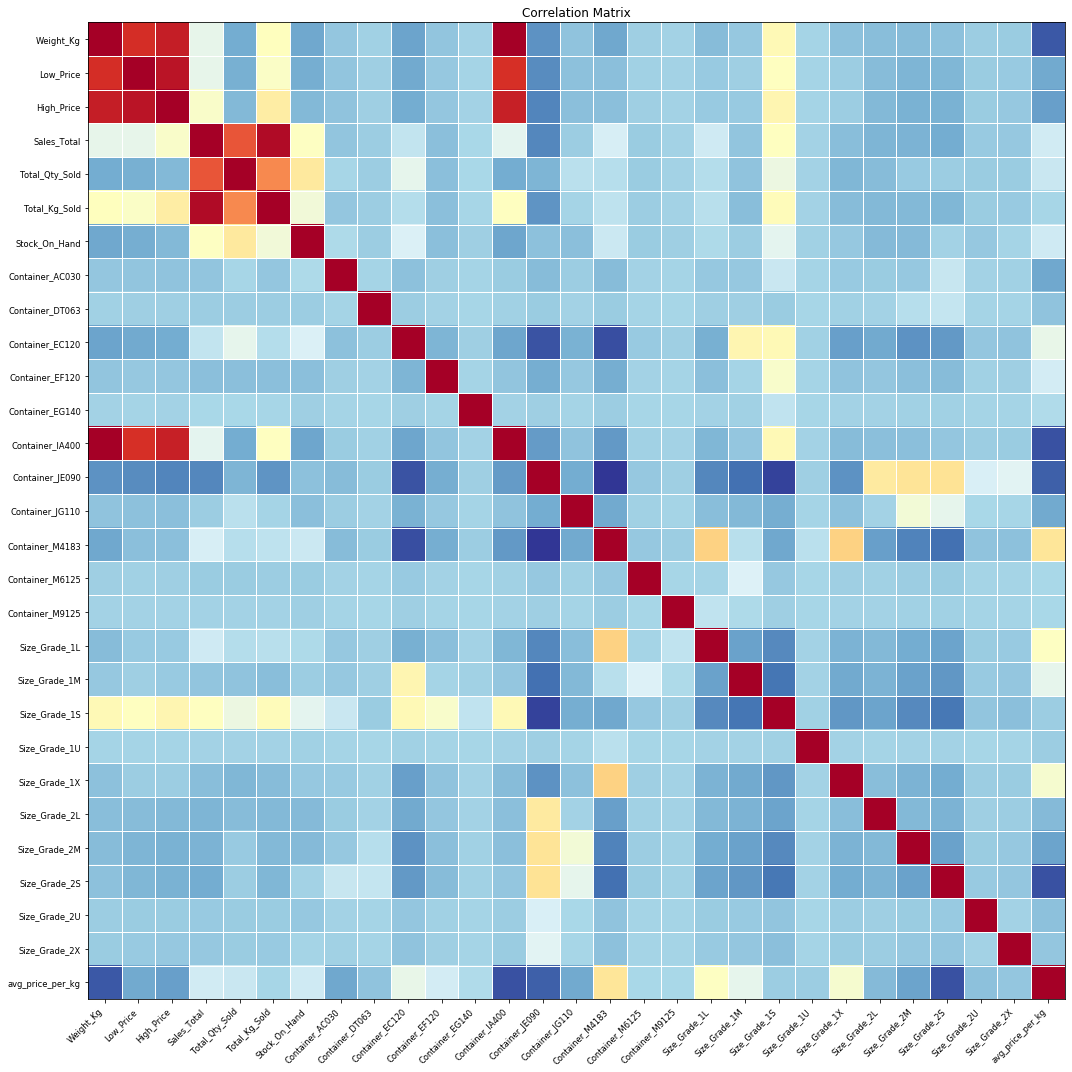

In [96]:
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);

plot_corr(dummy_df.corr(), xnames = dummy_df.corr().columns, ax = ax);

Here at this stage we will be looking for independent variable with a high correlation to avoid autocorealtion .The analysis for correlation are as follows (0.1-0.4 weak) (0.5-0.6 moderate) and (0.7-0.9  strong)  .If the independent variable has correlation coefficient of zero then we know that no relation exist with this variable.

##Fitting the model using statsmodels.OLS

###Generating the regression string

We will be importing the statsmodels library which has a rich set of statistical tools to help us. Those of you familiar with the R language will know that fitting a machine learning model requires a sort of string of the form:

y ~ X

which is read as follows: "Regress y on X". statsmodels works in a similar way, so we need to generate an appropriate string to feed to the method when we wish to fit the model.

In [97]:
from statsmodels.formula.api import ols

# Model DataFrame with all of the columns:
dfm = dummy_df.copy()

# The dependent variable:
y_name = 'avg_price_per_kg'
# The independent variable
# (let's first try all of the columns in the model DataFrame)
X_names = [col for col in dfm.columns if col != y_name]

# Build the OLS formula string " y ~ X "
formula_str = y_name+" ~ "+" + ".join(X_names);
print('Formula:\n\t {}'.format(formula_str))

Formula:
	 avg_price_per_kg ~ Weight_Kg + Date + Low_Price + High_Price + Sales_Total + Total_Qty_Sold + Total_Kg_Sold + Stock_On_Hand + Container_AC030 + Container_DT063 + Container_EC120 + Container_EF120 + Container_EG140 + Container_IA400 + Container_JE090 + Container_JG110 + Container_M4183 + Container_M6125 + Container_M9125 + Size_Grade_1L + Size_Grade_1M + Size_Grade_1S + Size_Grade_1U + Size_Grade_1X + Size_Grade_2L + Size_Grade_2M + Size_Grade_2S + Size_Grade_2U + Size_Grade_2X


In [98]:
# Fit the model using the model dataframe
model=ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Output the fitted summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:       avg_price_per_kg   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     17.00
Date:                Mon, 17 May 2021   Prob (F-statistic):          5.07e-269
Time:                        23:00:07   Log-Likelihood:                -3406.1
No. Observations:                1952   AIC:                             7156.
Df Residuals:                    1780   BIC:                             8115.
Df Model:                         171                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

We can see that there is a warning about strong multicollinearity. This is likely as a result of the incorrect filtering of one hot encoded dummy variables ( we noticed earlier that Gender_Male and Gender_Female are perfectly negative correlated).

In order to ensure that we don't assume an underlying relationship between the categories, we can call pd.get_dummies with the argument drop_first=True so that we only create n-1 columns for each variable with n categories (i.e. one variable/column with five categories will be transformed into four columns of 0's and 1's).

In [101]:
dummy_df = pd.get_dummies(apple_train, drop_first=True)

# Again make sure that all the column names have underscores instead of whitespaces
dummy_df.columns = [col.replace(" ", "_") for col in dummy_df.columns]

# Reorder columns with the dependent variable (claim_amount) the last column
column_titles = [col for col in dummy_df.columns if col !=
                 'avg_price_per_kg'] + ['avg_price_per_kg']
dummy_df = dummy_df.reindex(columns=column_titles)

dummy_df.head()

,Weight_Kg,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Container_DT063,Container_EC120,...,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,avg_price_per_kg
1,18.3,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,0,0,...,0,0,0,0,0,0,0,0,0,8.51
7,11.0,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,0,0,...,0,0,0,0,0,1,0,0,0,4.55
24,9.0,2020-04-16,55.0,55.0,990.0,18,162.0,1506,0,0,...,0,0,0,0,0,0,1,0,0,6.11
40,18.3,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,0,0,...,0,1,0,0,0,0,0,0,0,4.51
69,400.0,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,0,0,...,0,1,0,0,0,0,0,0,0,4.50


In [102]:
dummy_df.shape

(1952, 28)

We now have 41 columns instead of 44. This gives us 40 potential independent variables that could be used to build a relationship on Loan_Size

In [103]:
# We'll keep the model DataFrame, but only specify the columns we want to fit this time
X_names = [col for col in dummy_df.columns if col != y_name]

# Build the OLS formula string " y ~ X "
formula_str = y_name+' ~ '+'+'.join(X_names)

# Fit the model using the model dataframe
model = ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Output the fitted summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:       avg_price_per_kg   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     17.00
Date:                Mon, 17 May 2021   Prob (F-statistic):          5.07e-269
Time:                        23:24:32   Log-Likelihood:                -3406.1
No. Observations:                1952   AIC:                             7156.
Df Residuals:                    1780   BIC:                             8115.
Df Model:                         171                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

Variable Selection by Correlation and Significance
We now have 40 predictor variables to choose from, so we need a way of guiding us to choose the best ones to be our predictors. One way is to look at the correlations between the Loan Size and each variables in our DataFrame and select those with the strongest correlations (both positive and negative).

We also need to consider how significant those features are.

The code below will create a new DataFrame and store the correlation coefficents and p-values in that DataFrame for

In [104]:
# Calculate correlations between predictor variables and the response variable
corrs = dummy_df.corr()[ "avg_price_per_kg"].sort_values(ascending=False)

In [106]:
from scipy.stats import pearsonr

# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index if col!= "avg_price_per_kg"]
for col in column_titles:
    p_val = round(pearsonr(dummy_df[col], dummy_df["avg_price_per_kg"])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}
    
df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')
df_cp_sorted[df_cp_sorted['P_Value']<0.1]

,Correlation_Coefficient,P_Value
Container_M4183,0.403229,0.000000
Weight_Kg,-0.337886,0.000000
Container_JE090,-0.322235,0.000000
High_Price,-0.164496,0.000000
Size_Grade_2M,-0.153372,0.000000
Low_Price,-0.141740,0.000000
Container_JG110,-0.140148,0.000000
Size_Grade_2S,-0.352996,0.000000
Container_IA400,-0.355565,0.000000
Size_Grade_1X,0.251451,0.000000


Now, we've got a sorted list of the p-values and correlation coefficients for each of the features, when considered on their own.

If we were to use a logic test with a significance value of 5% (p-value < 0.05), we could infer that the following features are statistically significant:

Income
Mortgage
CCAvg
Experience
Age
Education_Undergrad
Family
Let's keep only the variables that have a significant correlation with the dependent variable. We'll put them into an independent variable DataFrame X

In [107]:
# The dependent variable remains the same:
y_data = dummy_df[y_name]  # y_name = 'Loan_Size'

# Model building - Independent Variable (IV) DataFrame
X_names = list(df_cp[df_cp['P_Value'] < 0.05].index)
X_data = dummy_df[X_names]

In [108]:
# Create the correlation matrix
corr = X_data.corr()

# Find rows and columnd where correlation coefficients > 0.9 or <-0.9
corr[np.abs(corr) > 0.9]

,Container_M4183,Size_Grade_1X,Container_EC120,Size_Grade_1M,Container_EF120,Sales_Total,Stock_On_Hand,Total_Qty_Sold,Size_Grade_2X,Container_DT063,Size_Grade_2U,Size_Grade_2L,Container_JG110,Low_Price,Size_Grade_2M,High_Price,Container_JE090,Weight_Kg,Size_Grade_2S,Container_IA400
Container_M4183,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size_Grade_1X,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Container_EC120,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size_Grade_1M,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Container_EF120,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales_Total,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stock_On_Hand,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Qty_Sold,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size_Grade_2X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Container_DT063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Instead of looking at the whole correlation matrix, it might be easier to isolate the sections of the correlation matrix to where the off-diagonal correlations are high:

In [109]:
# As before, we create the correlation matrix
# and find rows and columnd where correlation coefficients > 0.9 or <-0.9
corr = X_data.corr()
r, c = np.where(np.abs(corr) > 0.9)

# We are only interested in the off diagonal entries:
off_diagonal = np.where(r != c)

# Show the correlation matrix rows and columns where we have highly correlated off diagonal entries:
corr.iloc[r[off_diagonal], c[off_diagonal]]

,High_Price,Low_Price,Weight_Kg,Container_IA400,High_Price,Container_IA400,High_Price,Weight_Kg
Low_Price,0.938140,1.000000,0.863182,0.860219,0.938140,0.860219,0.938140,0.863182
High_Price,1.000000,0.938140,0.905852,0.902518,1.000000,0.902518,1.000000,0.905852
High_Price,1.000000,0.938140,0.905852,0.902518,1.000000,0.902518,1.000000,0.905852
High_Price,1.000000,0.938140,0.905852,0.902518,1.000000,0.902518,1.000000,0.905852
Weight_Kg,0.905852,0.863182,1.000000,0.999231,0.905852,0.999231,0.905852,1.000000
Weight_Kg,0.905852,0.863182,1.000000,0.999231,0.905852,0.999231,0.905852,1.000000
Container_IA400,0.902518,0.860219,0.999231,1.000000,0.902518,1.000000,0.902518,0.999231
Container_IA400,0.902518,0.860219,0.999231,1.000000,0.902518,1.000000,0.902518,0.999231


Okay, so it looks like Age and Experience are highly correlated (perhaps unsurprising if you take a moment to think about it).

This is also visible looking back at the correlation coefficient heatmap and matrix from earlier, but a more focused / subset view of the matrix is useful to isolate the coefficients of interest.

Considering which predictor variable to drop, Experience is slightly better correlated (and lower p-value) to the dependent variable Loan Size, so let's drop Age form the feature dataframe.

In [114]:
# Lets take a new subset of our potential independent variables
X_remove = ['Weight_Kg']
X_corr_names = [col for col in X_names if col not in X_remove]

# Create our new OLS formula based-upon our smaller subset
formula_str = y_name+' ~ '+' + '.join(X_corr_names);
print('Formula:\n\t{}'.format(formula_str))

Formula:
	avg_price_per_kg ~ Container_M4183 + Size_Grade_1X + Container_EC120 + Size_Grade_1M + Container_EF120 + Sales_Total + Stock_On_Hand + Total_Qty_Sold + Size_Grade_2X + Container_DT063 + Size_Grade_2U + Size_Grade_2L + Container_JG110 + Low_Price + Size_Grade_2M + High_Price + Container_JE090 + Size_Grade_2S + Container_IA400


In [115]:
# Fit the OLS model using the model dataframe
model=ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Display the fitted summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:       avg_price_per_kg   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     93.89
Date:                Tue, 18 May 2021   Prob (F-statistic):          1.61e-257
Time:                        00:09:44   Log-Likelihood:                -3712.7
No. Observations:                1952   AIC:                             7465.
Df Residuals:                    1932   BIC:                             7577.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.5120      0.253     

Variable Selection by Variance Thresholds
Variance Thresholds remove features whose values don't change much from observation to observation. The objective here is to remove all features that have a variance lower than the selected threshold.

For example, suppose that in our loans dataset 97% of observations were for 40-year-old women, then the Age and Gender features can be removed without a great loss in information.

It is important to note that variance is dependent on scale, so the features will have to be normalized before implementing variance thresholding.

In [116]:
# Separate data into independent (X) and independent (y) variables
X_names = list(dummy_df.columns)
X_names.remove(y_name)
X_data = dummy_df[X_names]
y_data = dummy_df[y_name]

In [118]:
# Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_data)
X_normalize = apple_train.DataFrame(X_scaled, columns=X_data.columns)

TypeError: The DTypes <class 'numpy.dtype[datetime64]'> and <class 'numpy.dtype[float64]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.

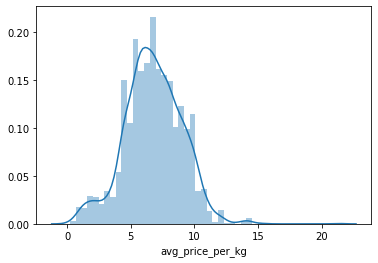

In [19]:
# target distribution
sns.distplot(dummy_df.avg_price_per_kg, kde=True)

# Training

In [20]:
dummy_df.shape

(1952, 41)

# Predicting on the test set

In [21]:
# Function to fit data, make predictions, and evaluate model
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_pred,y_test))

def r_squared(y_test, y_pred):
    return r2_score(y_test, y_pred)
    
# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model,X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = rmse(y_train, train_pred)
    test_rmse = rmse(y_test, test_pred)
    
    train_r2 = r_squared(y_train, train_pred)
    test_r2 = r_squared(y_test, test_pred)
    
    df = {'Train RMSE': train_rmse,'Train R^2':train_r2,'Test RMSE': test_rmse,'Test R^2':test_r2}
    
    return df

In [22]:
# Our model will be the same throughout, so will our y
model = LinearRegression()
y = dummy_df['avg_price_per_kg']
dummy_df.drop("avg_price_per_kg", axis=1, inplace=True)
y.shape

(1952,)

In [23]:
# fit the model to the data and make predictions - OverallQual
X = dummy_df.values
fit_and_evaluate(model,X,y)

{'Train RMSE': 1.366595189003986,
 'Train R^2': 0.6376979427568851,
 'Test RMSE': 1.4069522175245361,
 'Test R^2': 0.5733906253290224}

In [24]:
# save the model
# import pickle
# model_load_path = "model.pkl"
# with open(model_load_path,'rb') as file:
#     mod = pickle.load(file)
test.head()

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2
2,3,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45
3,4,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8
4,5,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19


In [25]:
test['Date']= pd.to_datetime(test['Date'])
test["Day"] = test['Date'].map(lambda x: x.day)
test["Month"] = test['Date'].map(lambda x: x.month)
test["Year"] = test['Date'].map(lambda x: x.year)
test["Day_Of_Week"] = test["Date"].dt.dayofweek
test.drop("Date", axis=1, inplace=True)
test.drop("Commodities", axis=1, inplace=True)

X_test = pd.get_dummies(test)
X_test["Price_Difference"] = X_test.High_Price - X_test.Low_Price


In [26]:
test_index = X_test.Index

X_test.drop("Index", axis=1, inplace=True)

test["Price_Difference"] = test.High_Price - test.Low_Price
X_test.shape

(685, 40)

In [27]:
X_test.columns

Index(['Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold',
       'Total_Kg_Sold', 'Stock_On_Hand', 'Day', 'Month', 'Year', 'Day_Of_Week',
       'Province_CAPE', 'Province_EASTERN CAPE', 'Province_NATAL',
       'Province_ORANGE FREE STATE', 'Province_TRANSVAAL',
       'Province_W.CAPE-BERGRIVER ETC', 'Province_WEST COAST',
       'Container_AC030', 'Container_DT063', 'Container_EC120',
       'Container_EF120', 'Container_EG140', 'Container_IA400',
       'Container_JE090', 'Container_JG110', 'Container_M4183',
       'Container_M6125', 'Container_M9125', 'Size_Grade_1L', 'Size_Grade_1M',
       'Size_Grade_1S', 'Size_Grade_1U', 'Size_Grade_1X', 'Size_Grade_2L',
       'Size_Grade_2M', 'Size_Grade_2S', 'Size_Grade_2U', 'Size_Grade_2X',
       'Price_Difference'],
      dtype='object')

In [28]:
dummy_df.columns

Index(['Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold',
       'Total_Kg_Sold', 'Stock_On_Hand', 'Price_Difference', 'Day', 'Month',
       'Year', 'Day_Of_Week', 'Province_CAPE', 'Province_EASTERN CAPE',
       'Province_NATAL', 'Province_ORANGE FREE STATE', 'Province_TRANSVAAL',
       'Province_W.CAPE-BERGRIVER ETC', 'Province_WEST COAST',
       'Container_AC030', 'Container_DT063', 'Container_EC120',
       'Container_EF120', 'Container_EG140', 'Container_IA400',
       'Container_JE090', 'Container_JG110', 'Container_M4183',
       'Container_M6125', 'Container_M9125', 'Size_Grade_1L', 'Size_Grade_1M',
       'Size_Grade_1S', 'Size_Grade_1U', 'Size_Grade_1X', 'Size_Grade_2L',
       'Size_Grade_2M', 'Size_Grade_2S', 'Size_Grade_2U', 'Size_Grade_2X'],
      dtype='object')

In [29]:
preds = model.predict(X_test)

In [30]:
preds

array([-3.83184460e+07, -4.90753053e+07, -3.83184392e+07, -4.90753034e+07,
       -2.77108646e+08, -2.59509137e+09, -1.34431924e+07, -4.90753500e+07,
       -4.90753574e+07, -4.90753124e+07,  2.62871188e+09, -2.59509091e+09,
       -4.90753409e+07,  2.62871191e+09,  2.62871190e+09,  2.62871191e+09,
        3.89965336e+07,  2.62871190e+09, -2.77108702e+08,  2.62871190e+09,
        2.62871189e+09, -2.59509092e+09,  2.62871190e+09,  2.62871191e+09,
        2.62871191e+09, -3.83184775e+07, -3.83184884e+07, -2.77108648e+08,
       -4.90753325e+07, -4.90753476e+07, -4.90753258e+07, -1.34431964e+07,
       -4.90753230e+07, -4.90753038e+07, -2.59509219e+09, -4.90753054e+07,
       -2.77108629e+08, -2.77108679e+08, -1.34431945e+07, -4.90753561e+07,
       -4.90754197e+07, -2.77108740e+08, -4.90753121e+07,  2.62871191e+09,
        2.62871190e+09,  2.62871189e+09, -2.59509092e+09,  2.62871190e+09,
        2.62871191e+09, -2.59509263e+09, -2.59509128e+09,  2.62871189e+09,
       -4.90753706e+07, -

In [31]:
# create submission dataframe
# Create Dataframe of Order_No and Time from Pickup to Arrival
submission = pd.DataFrame(
    {'Index': test_index,
     'Price': preds
    })

In [32]:
submission.to_csv("submission_1.csv")